In [1]:
import snap
import numpy as np
import csv

from itertools import permutations
from matplotlib import pyplot as plt
from collections import defaultdict
import networkx as nx
from matplotlib.pyplot import cm

## 1. Read in the Graphs

In [2]:
FILEPATH = "dataset/edges/"

In [3]:
dir_Graph_dict = {}
undir_Graph_dict = {}
for i in range(1, 915):
    G_dir = snap.PNEANet.New()
    G_undir = snap.PNEANet.New() 
    file_name = FILEPATH + str(i) + "_edges.txt"
    firstline = True
    try:
        with open(file_name) as csv_file:
            edge_reader = csv.reader(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            edge_count = 0
            undir_edge_count = 0
            for row in edge_reader:
                if firstline:
                    firstline = False
                    continue
                if i == 814:
                    print row[0]
                if not G_dir.IsNode(int(row[0])):
                    G_dir.AddNode(int(row[0]))
                if not G_dir.IsNode(int(row[1])):
                    G_dir.AddNode(int(row[1]))
                for _ in range(int(float(row[2]))):
                    G_dir.AddEdge(int(row[0]), int(row[1]), edge_count)
                    edge_count += 1
                    G_dir.AddEdge(int(row[1]), int(row[0]), edge_count)
                    edge_count += 1
                if not G_undir.IsNode(int(row[0])):
                    G_undir.AddNode(int(row[0]))
                if not G_undir.IsNode(int(row[1])):
                    G_undir.AddNode(int(row[1]))
                for _ in range(int(float(row[2]))):
                    G_undir.AddEdge(int(row[0]), int(row[1]), undir_edge_count)
                    undir_edge_count += 1
        dir_Graph_dict[i] = G_dir
        undir_Graph_dict[i] = G_undir
    except IOError:
        continue

5005819


## 2. Get Centralities

In [4]:
# Closeness Centrality
def get_closeness(G, G_undir):
    return [(snap.GetClosenessCentr(G, NI.GetId()), NI.GetId()) for NI in G.Nodes()]

In [5]:
# Betweenness Centrality
def get_betweenness(G, G_undir):
    Nodes = snap.TIntFltH()
    Edges = snap.TIntPrFltH()
    snap.GetBetweennessCentr(G, Nodes, Edges, True)
    return [(Nodes[node], node) for node in Nodes]

In [6]:
# PageRank Centrality
def get_pagerank(G, G_undir):
    PRankH = snap.TIntFltH()
    snap.GetPageRank(G, PRankH)
    return [(PRankH[item], item) for item in PRankH]

In [7]:
# Testing
G, G_undir = dir_Graph_dict[1], undir_Graph_dict[1]
closeness = get_closeness(G, G_undir)
closeness.sort(reverse=True)
print(closeness)
betweenness = get_betweenness(G, G_undir)
betweenness.sort(reverse=True)
print(betweenness)
pagerank = get_pagerank(G, G_undir)    
pagerank.sort(reverse=True)
print(pagerank)
closeness[0][1]

[(0.8333333333333334, 40), (0.7692307692307692, 349), (0.7142857142857143, 107), (0.7142857142857143, 60), (0.6896551724137931, 129), (0.6451612903225806, 148), (0.625, 471), (0.5714285714285714, 758), (0.5555555555555556, 766), (0.5555555555555556, 316), (0.5555555555555556, 63), (0.5405405405405405, 252), (0.5405405405405405, 94), (0.5263157894736842, 3060), (0.5263157894736842, 437), (0.5, 5465), (0.5, 2392), (0.47619047619047616, 1572), (0.46511627906976744, 3876), (0.46511627906976744, 34), (0.3921568627450981, 1362)]
[(66.13988887667614, 40), (26.491134971948245, 349), (21.453725942622313, 60), (21.112301587301587, 471), (11.993218015991342, 129), (10.190980571428538, 107), (3.1254552454406306, 148), (2.44378271831688, 316), (1.9607652672052802, 252), (0.06521739130434782, 758), (0.023529411764705882, 437), (0.0, 5465), (0.0, 3876), (0.0, 3060), (0.0, 2392), (0.0, 1572), (0.0, 1362), (0.0, 766), (0.0, 94), (0.0, 63), (0.0, 34)]
[(0.16013290577956066, 40), (0.12156555193270177, 60

40

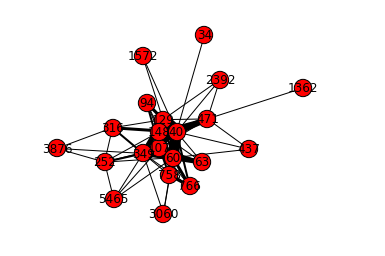

In [24]:
G_nx=nx.Graph()

file_name = FILEPATH + str(1) + "_edges.txt"
with open(file_name) as csv_file:
    edge_reader = csv.reader(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    edge_count = 0
    undir_edge_count = 0
    firstline = True
    for row in edge_reader:
        if firstline:
            firstline = False
            continue
        if not G_nx.has_node(int(row[0])):
            G_nx.add_node(int(row[0]))
        if not G_nx.has_node(int(row[1])):
            G_nx.add_node(int(row[1]))
        G_nx.add_edge(int(row[0]), int(row[1]), weight=int(float(row[2])))
        
# nx.draw(G_nx, with_labels=True, font_weight='bold')
# plt.show()

pos=nx.spring_layout(G_nx) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_nx,pos)

# edges
for (u,v,d) in G_nx.edges(data=True):
    nx.draw_networkx_edges(G_nx,pos,edgelist=[(u,v)],width=d['weight'])

# labels
nx.draw_networkx_labels(G_nx,pos,font_family='sans-serif')

plt.axis('off')
plt.show()

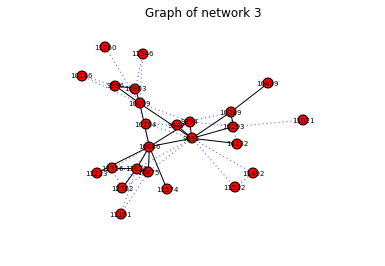

In [64]:
G, G_undir = dir_Graph_dict[3], undir_Graph_dict[3]
G = nx.read_edgelist("dataset/edges/3_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=100)
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Graph of network 3")
plt.show()

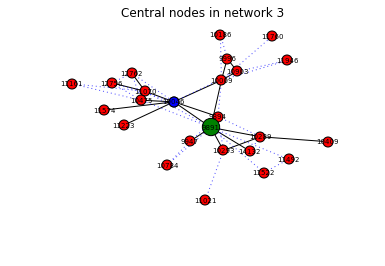

In [15]:
G, G_undir = dir_Graph_dict[3], undir_Graph_dict[3]
G = nx.read_edgelist("dataset/edges/3_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=100)
nx.draw_networkx_nodes(G,pos,node_size=100, nodelist=[10046], node_color='b')
nx.draw_networkx_nodes(G,pos,node_size=300, nodelist=[9891], node_color='g')
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Central nodes in network 3")
plt.show()

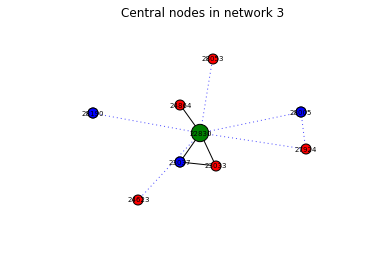

In [16]:
G, G_undir = dir_Graph_dict[3], undir_Graph_dict[3]
G = nx.read_edgelist("dataset/edges/5_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=100)
nx.draw_networkx_nodes(G,pos,node_size=100, nodelist=[22830,28005,28190,23037], node_color='b')
nx.draw_networkx_nodes(G,pos,node_size=300, nodelist=[22830], node_color='g')
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Central nodes in network 3")
plt.show()

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


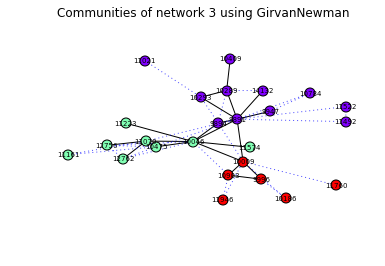

In [57]:
G, G_undir = dir_Graph_dict[3], undir_Graph_dict[3]
CmtyV = snap.TCnComV()
copy_graph = snap.ConvertGraph(snap.PUNGraph, G_undir)
modularity = snap.CommunityGirvanNewman(copy_graph, CmtyV)
nodes = []
for Cmty in CmtyV:
    node_list = []
    for NI in Cmty:
        node_list.append(NI)
    nodes.append(node_list)
    
G = nx.read_edgelist("dataset/edges/3_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
color=cm.rainbow(np.linspace(0,1,len(nodes)))
print(color)
i = 0
for node_list in nodes:
    nx.draw_networkx_nodes(G,pos,node_size=100, nodelist=node_list, node_color=color[i])
    i+=1
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Communities of network 3 using GirvanNewman")
plt.show()

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


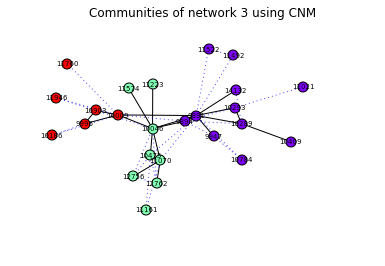

In [58]:
G, G_undir = dir_Graph_dict[3], undir_Graph_dict[3]
CmtyV = snap.TCnComV()
copy_graph = snap.ConvertGraph(snap.PUNGraph, G_undir)
modularity = snap.CommunityCNM(copy_graph, CmtyV)
nodes = []
for Cmty in CmtyV:
    node_list = []
    for NI in Cmty:
        node_list.append(NI)
    nodes.append(node_list)
    
G = nx.read_edgelist("dataset/edges/3_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
color=cm.rainbow(np.linspace(0,1,len(nodes)))
print(color)
i = 0
for node_list in nodes:
    nx.draw_networkx_nodes(G,pos,node_size=100, nodelist=node_list, node_color=color[i])
    i+=1
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Communities of network 3 using CNM")
plt.show()

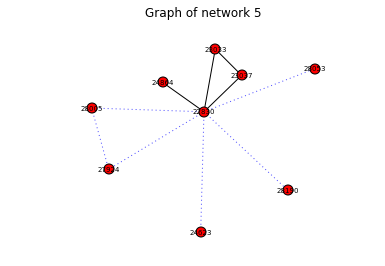

In [44]:
G = nx.read_edgelist("dataset/edges/5_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=100)
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Graph of network 5")
plt.show()

[[5.0000000e-01 0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]]


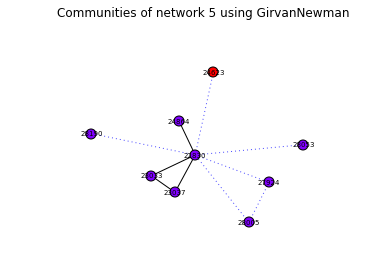

In [61]:
G, G_undir = dir_Graph_dict[5], undir_Graph_dict[5]
CmtyV = snap.TCnComV()
copy_graph = snap.ConvertGraph(snap.PUNGraph, G_undir)
modularity = snap.CommunityGirvanNewman(copy_graph, CmtyV)
nodes = []
for Cmty in CmtyV:
    node_list = []
    for NI in Cmty:
        node_list.append(NI)
    nodes.append(node_list)
    
G = nx.read_edgelist("dataset/edges/5_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
color=cm.rainbow(np.linspace(0,1,len(nodes)))
print(color)
i = 0
for node_list in nodes:
    nx.draw_networkx_nodes(G,pos,node_size=100, nodelist=node_list, node_color=color[i])
    i+=1
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Communities of network 5 using GirvanNewman")
plt.show()

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


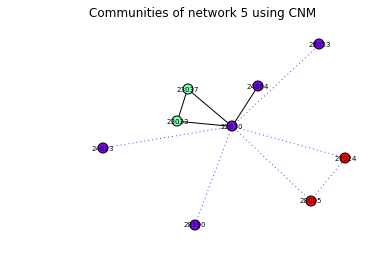

In [62]:
G, G_undir = dir_Graph_dict[5], undir_Graph_dict[5]
CmtyV = snap.TCnComV()
copy_graph = snap.ConvertGraph(snap.PUNGraph, G_undir)
modularity = snap.CommunityCNM(copy_graph, CmtyV)
nodes = []
for Cmty in CmtyV:
    node_list = []
    for NI in Cmty:
        node_list.append(NI)
    nodes.append(node_list)
    
G = nx.read_edgelist("dataset/edges/5_edges.txt", comments='s', delimiter= ',', nodetype=int, data=(('weight',float),), create_using=nx.Graph())
#nx.draw_networkx(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]
pos=nx.spring_layout(G)
color=cm.rainbow(np.linspace(0,1,len(nodes)))
print(color)
i = 0
for node_list in nodes:
    nx.draw_networkx_nodes(G,pos,node_size=100, nodelist=node_list, node_color=color[i])
    i+=1
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.7,edge_color='b',style='dotted')
nx.draw_networkx_labels(G,pos,font_size=7,font_family='sans-serif')
plt.axis('off')
plt.title("Communities of network 5 using CNM")
plt.show()

## 3. Find the central Nodes

In [10]:
closeness_nodes = {}
betweenness_nodes = {}
pagerank_nodes = {}
central_nodes = {}
for i in range(1, 915):
    if i not in dir_Graph_dict:
        continue
    print i
    G, G_undir = dir_Graph_dict[i], undir_Graph_dict[i]
    closeness = get_closeness(G, G_undir)
    closeness.sort(reverse=True)
    betweenness = get_betweenness(G, G_undir)
    betweenness.sort(reverse=True)
    pagerank = get_pagerank(G, G_undir)
    pagerank.sort(reverse=True)
    closeness_nodes[i] = (closeness[0][1], closeness[1][1])
    betweenness_nodes[i] = (betweenness[0][1], betweenness[1][1])
    pagerank_nodes[i] = (pagerank[0][1], pagerank[1][1])
    
    cnt = defaultdict(float)
    cnt[closeness[0][1]] += 1.1
    cnt[closeness[1][1]] += 1
    cnt[betweenness[0][1]]+= 1.1
    cnt[betweenness[1][1]] += 1
    cnt[pagerank[0][1]] += 1.1
    cnt[pagerank[1][1]] += 1
    max_cnt = 0
    for k,v in cnt.items():
        if v > max_cnt:
            max_cnt = v
            central_nodes[i] = k

1
2
3
5
6
7
8
9
10
11
13
14
15
17
19
21
22
23
24
25
26
27
28
30
31
32
33
34
36
38
39
40
41
42
43
44
45
47
48
49
50
51
52
54
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
76
80
81
82
83
84
85
86
87
88
89
91
92
93
97
98
99
100
101
102
103
104
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
157
158
159
161
162
163
164
165
166
167
169
170
171
173
174
175
176
177
178
179
180
182
183
184
185
186
187
189
190
191
192
193
194
195
197
198
199
200
201
204
205
206
208
209
210
211
212
213
214
216
217
218
220
221
222
223
224
225
226
227
229
231
232
234
235
236
238
239
240
241
242
243
244
246
247
248
249
250
251
252
253
254
255
256
257
258
260
261
262
263
264
265
266
268
269
271
272
273
274
276
278
279
280
281
282
283
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
313
314
315
316
317
318
319
320

## Write out

In [11]:
with open("central_nodes.csv", mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["graph_id", "closeness_1", "closeness_2", "betweenness_1", "betweenness_2", "pagerank1", "pagerank2", "central_node"])
    for i in range(1, 915):
        if i not in dir_Graph_dict:
            continue
        csv_writer.writerow([i, closeness_nodes[i][0], closeness_nodes[i][1],
                            betweenness_nodes[i][0], betweenness_nodes[i][1],
                            pagerank_nodes[i][0], pagerank_nodes[i][1],
                            central_nodes[i]])

## 4. K-Core

In [40]:
def get_k_core(G, G_undir):
    CoreIDSzV = snap.TIntPrV()
    kValue = snap.GetKCoreNodes(G_undir, CoreIDSzV)
    return [(item.GetVal1(), #order
             item.GetVal2() #nodes
            ) for item in CoreIDSzV]

In [42]:
# Testing
G, G_undir = dir_Graph_dict[5], undir_Graph_dict[5]
get_k_core(G, G_undir)

[(0, 9), (1, 9), (2, 6), (3, 4), (4, 4), (5, 4), (6, 3), (7, 3), (8, 3)]

## Write out

In [36]:
num_k_cores = {}
for i in range(1, 915):
    if i not in dir_Graph_dict:
        continue
    print i
    G, G_undir = dir_Graph_dict[i], undir_Graph_dict[i]
    k_cores = get_k_core(G, G_undir)
    if len(k_cores) < 6:
        num_k_cores[i] = []
        for j in range(1, 6):
            if j < len(k_cores):
                num_k_cores[i].append(k_cores[j][1])
            else:
                num_k_cores[i].append(0)
    else:
        num_k_cores[i]= [k_cores[1][1], k_cores[2][1], k_cores[3][1], k_cores[4][1], k_cores[5][1]]

with open("k_core.csv", mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["graph_id", "num_in_1core", "num_in_2core", "num_in_3core", "num_in_4core", "num_in_5core"])
    for i in range(1, 915):
        if i not in dir_Graph_dict:
            continue
        csv_writer.writerow([i, num_k_cores[i][0], num_k_cores[i][1], num_k_cores[i][2], num_k_cores[i][3], num_k_cores[i][4]])
    

1
2
3
5
6
7
8
9
10
11
13
14
15
17
19
21
22
23
24
25
26
27
28
30
31
32
33
34
36
38
39
40
41
42
43
44
45
47
48
49
50
51
52
54
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
76
80
81
82
83
84
85
86
87
88
89
91
92
93
97
98
99
100
101
102
103
104
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
157
158
159
161
162
163
164
165
166
167
169
170
171
173
174
175
176
177
178
179
180
182
183
184
185
186
187
189
190
191
192
193
194
195
197
198
199
200
201
204
205
206
208
209
210
211
212
213
214
216
217
218
220
221
222
223
224
225
226
227
229
231
232
234
235
236
238
239
240
241
242
243
244
246
247
248
249
250
251
252
253
254
255
256
257
258
260
261
262
263
264
265
266
268
269
271
272
273
274
276
278
279
280
281
282
283
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
313
314
315
316
317
318
319
320

## 5. Community Detection

In [60]:
def community_Girvan_Newman(G, G_undir):
    CmtyV = snap.TCnComV()
    copy_graph = snap.ConvertGraph(snap.PUNGraph, G_undir)
    modularity = snap.CommunityGirvanNewman(copy_graph, CmtyV)
    return modularity

In [62]:
def community_CNM(G, G_undir):
    CmtyV = snap.TCnComV()
    copy_graph = snap.ConvertGraph(snap.PUNGraph, G_undir)
    modularity = snap.CommunityCNM(copy_graph, CmtyV)
    return modularity

## Write out

In [63]:
with open("modularity.csv", mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["graph_id", "GN_Modularity", "CNM_Modularity"])
    for i in range(1, 915):
        print i
        if i not in dir_Graph_dict:
            continue
        G, G_undir = dir_Graph_dict[i], undir_Graph_dict[i]
        csv_writer.writerow([i, community_Girvan_Newman(G, G_undir), community_CNM(G, G_undir)])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
